In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from ImageSliceViewer3D import *
import matplotlib
from tqdm import tqdm
matplotlib.rcParams['figure.figsize'] = (10, 10)

In [2]:
filepath = "PhantomGenerator/output/Simulation"
files = [file for file in np.sort(listdir(filepath)) if file.endswith(".npy")]
height, width = np.load(join(filepath,files[0])).shape
depth = len(files)
volume = np.zeros((depth, height, width))
for i,file in tqdm(enumerate(files)):
    volume[i,:,:] = np.load(join(filepath,file))

volume = volume[0:300,:,:].astype('float32')

2400it [00:18, 133.17it/s]


In [3]:
height, width

(128, 128)

In [3]:
ImageSliceViewer3D(volume)

In [8]:
volume.shape

(300, 128, 128)

In [9]:
ImageSliceViewer3D(np.transpose(volume, (1,2,0)))#from 56 to 71

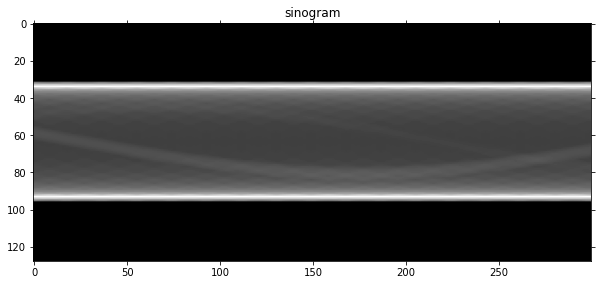

In [10]:
plt.imshow(np.transpose(np.sum(volume, axis=1), (1,0)), cmap="gray")
plt.title("sinogram")
plt.show()

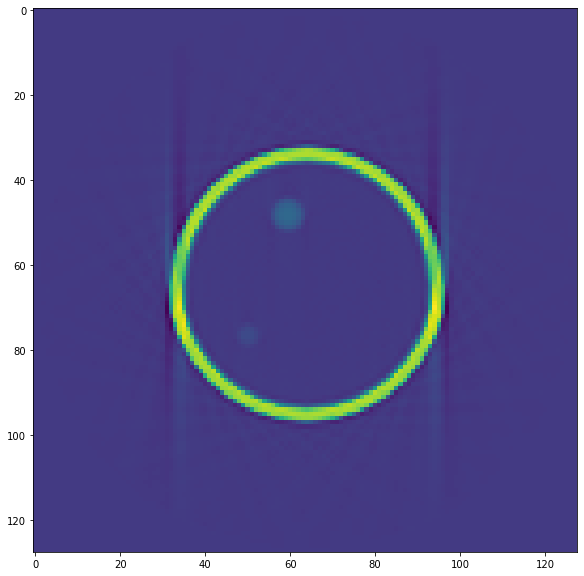

In [18]:
from skimage.transform import iradon
from skimage.transform import iradon_sart

#sinogram = np.transpose(proj, (1,2,0))[439,:,:]

reconstruction_fbp = iradon_sart(np.transpose(np.sum(volume, axis=1), (1,0)), theta=np.linspace(0,180,300))
#error = reconstruction_fbp - image
#print(f"FBP rms reconstruction error: {np.sqrt(np.mean(error**2)):.3g}")

plt.imshow(reconstruction_fbp)
plt.show()

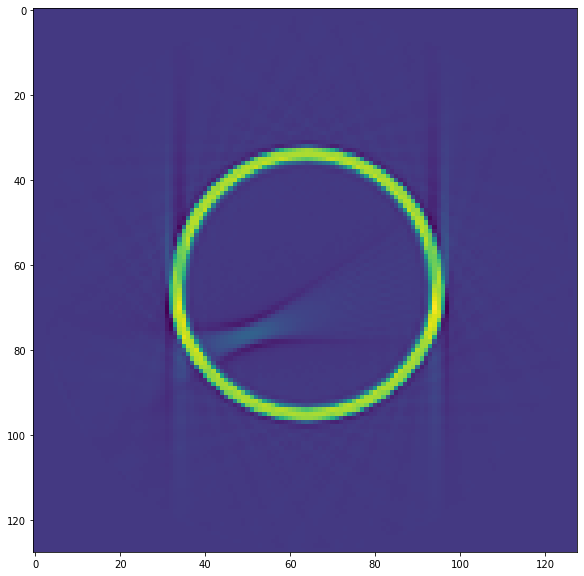

In [13]:
from skimage.transform import iradon
from skimage.transform import iradon_sart

sinogram = np.transpose(volume, (1,2,0))[49,:,:]

reconstruction_fbp = iradon_sart(sinogram, theta=np.linspace(0,180,300))
#error = reconstruction_fbp - image
#print(f"FBP rms reconstruction error: {np.sqrt(np.mean(error**2)):.3g}")

plt.imshow(reconstruction_fbp)
plt.show()

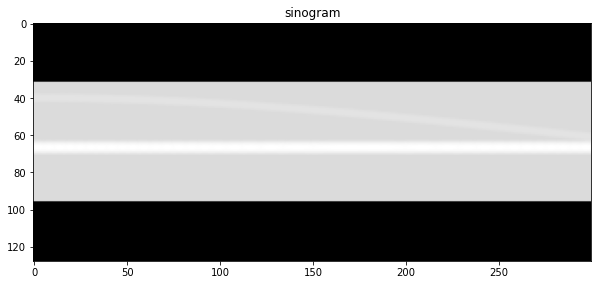

In [16]:
plt.imshow(np.transpose(np.sum(volume, axis=2), (1,0)), cmap="gray")
plt.title("sinogram")
plt.show()